# Credits predicting - MSHP competition 2023 S211

# Import libraries

In [1]:
# Data
import pandas as pd
import numpy as np

## Drawing
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

## Train, test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from catboost import Pool, metrics, cv
from xgboost import DMatrix

## Impute data
from sklearn.impute import SimpleImputer

## Normalize data
from sklearn.preprocessing import MinMaxScaler

# ML
## Models
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

## Params selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

ignore warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data preprocess

In [3]:
df_train = pd.read_csv('./datasets/credit_train.csv')
df_test = pd.read_csv('./datasets/credit_test.csv')

In [4]:
df_test

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income
0,39162,F,18,UNM,"39469,00",6,1.44,GRD,NaN,NaN,SPC,"0,424628",САНКТ-ПЕТЕРБУРГ Г,30000.0
1,10673,F,63,WID,"16693,00",10,1.32,GRD,2.0,0.0,SPC,"0,311945",ОБЛ ЛЕНИНГРАДСКАЯ,21250.0
2,121409,M,42,MAR,"60260,00",10,1.10,GRD,5.0,0.0,SPC,"0,421982",МОСКВА Г,150000.0
3,23504,M,41,MAR,"32479,00",12,1.10,GRD,1.0,0.0,DIR,"0,406572",ТАТАРСТАН РЕСП,150000.0
4,69269,F,24,UNM,"8159,00",12,1.10,SCH,2.0,0.0,SPC,"0,418243",ТВЕРСКАЯ ОБЛ,16000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56342,14148,F,21,UNM,"40980,00",24,1.90,GRD,1.0,0.0,SPC,"0,429402",САМАРСКАЯ,22000.0
56343,153732,M,56,MAR,"16009,00",10,1.10,SCH,0.0,0.0,SPC,"0,494229",САМАРСКАЯ ОБЛ,29000.0
56344,37647,M,54,MAR,"22448,00",12,1.10,SCH,1.0,0.0,UMN,"0,312089",РОСТОВСКАЯ ОБЛ,26500.0
56345,92808,F,27,UNM,"13829,00",10,1.90,GRD,2.0,0.0,SPC,"0,339009",ОБЛ СВЕРДЛОВСКАЯ,38000.0


In [5]:
df_train

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income,opened
0,26031,M,24,UNM,"24000,00",10,1.60,SCH,2.0,0.0,SPC,"0,728851",ОБЛ ЛЕНИНГРАДСКАЯ,35000.0,True
1,148877,M,23,UNM,"16339,00",18,1.10,SCH,2.0,0.0,SPC,"0,347385",МОСКВА Г,38000.0,True
2,142019,M,54,UNM,"15652,00",10,1.32,GRD,2.0,0.0,SPC,"0,349705",ОБЛ МОСКОВСКАЯ,38000.0,True
3,146816,F,52,UNM,"16560,00",10,1.10,SCH,1.0,0.0,SPC,"0,359232",РЕСП МОРДОВИЯ,28000.0,False
4,27699,F,63,WID,"9078,00",18,1.10,SCH,4.0,0.0,SPC,"0,529368",ЧЕЛЯБИНСКАЯ ОБЛ,30000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114394,119880,M,29,MAR,"29678,00",10,1.60,GRD,1.0,0.0,SPC,"0,721156",ОМСКАЯ ОБЛАСТЬ,25000.0,False
114395,103695,M,29,MAR,"23068,00",15,1.10,GRD,3.0,0.0,SPC,"0,566393",ТЮМЕНСКАЯ ОБЛ,30000.0,True
114396,131933,F,45,MAR,"16418,00",10,1.10,SCH,1.0,0.0,UMN,"0,327380",ОБЛ БРЯНСКАЯ,30400.0,False
114397,146868,F,49,MAR,"12169,00",10,1.40,SCH,1.0,0.0,SPC,"0,467395",ТАМБОВСКАЯ ОБЛ,16000.0,False


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'credit_month'}>],
       [<Axes: title={'center': 'tariff_id'}>,
        <Axes: title={'center': 'credit_count'}>,
        <Axes: title={'center': 'overdue_credit_count'}>],
       [<Axes: title={'center': 'income'}>, <Axes: >, <Axes: >]],
      dtype=object)

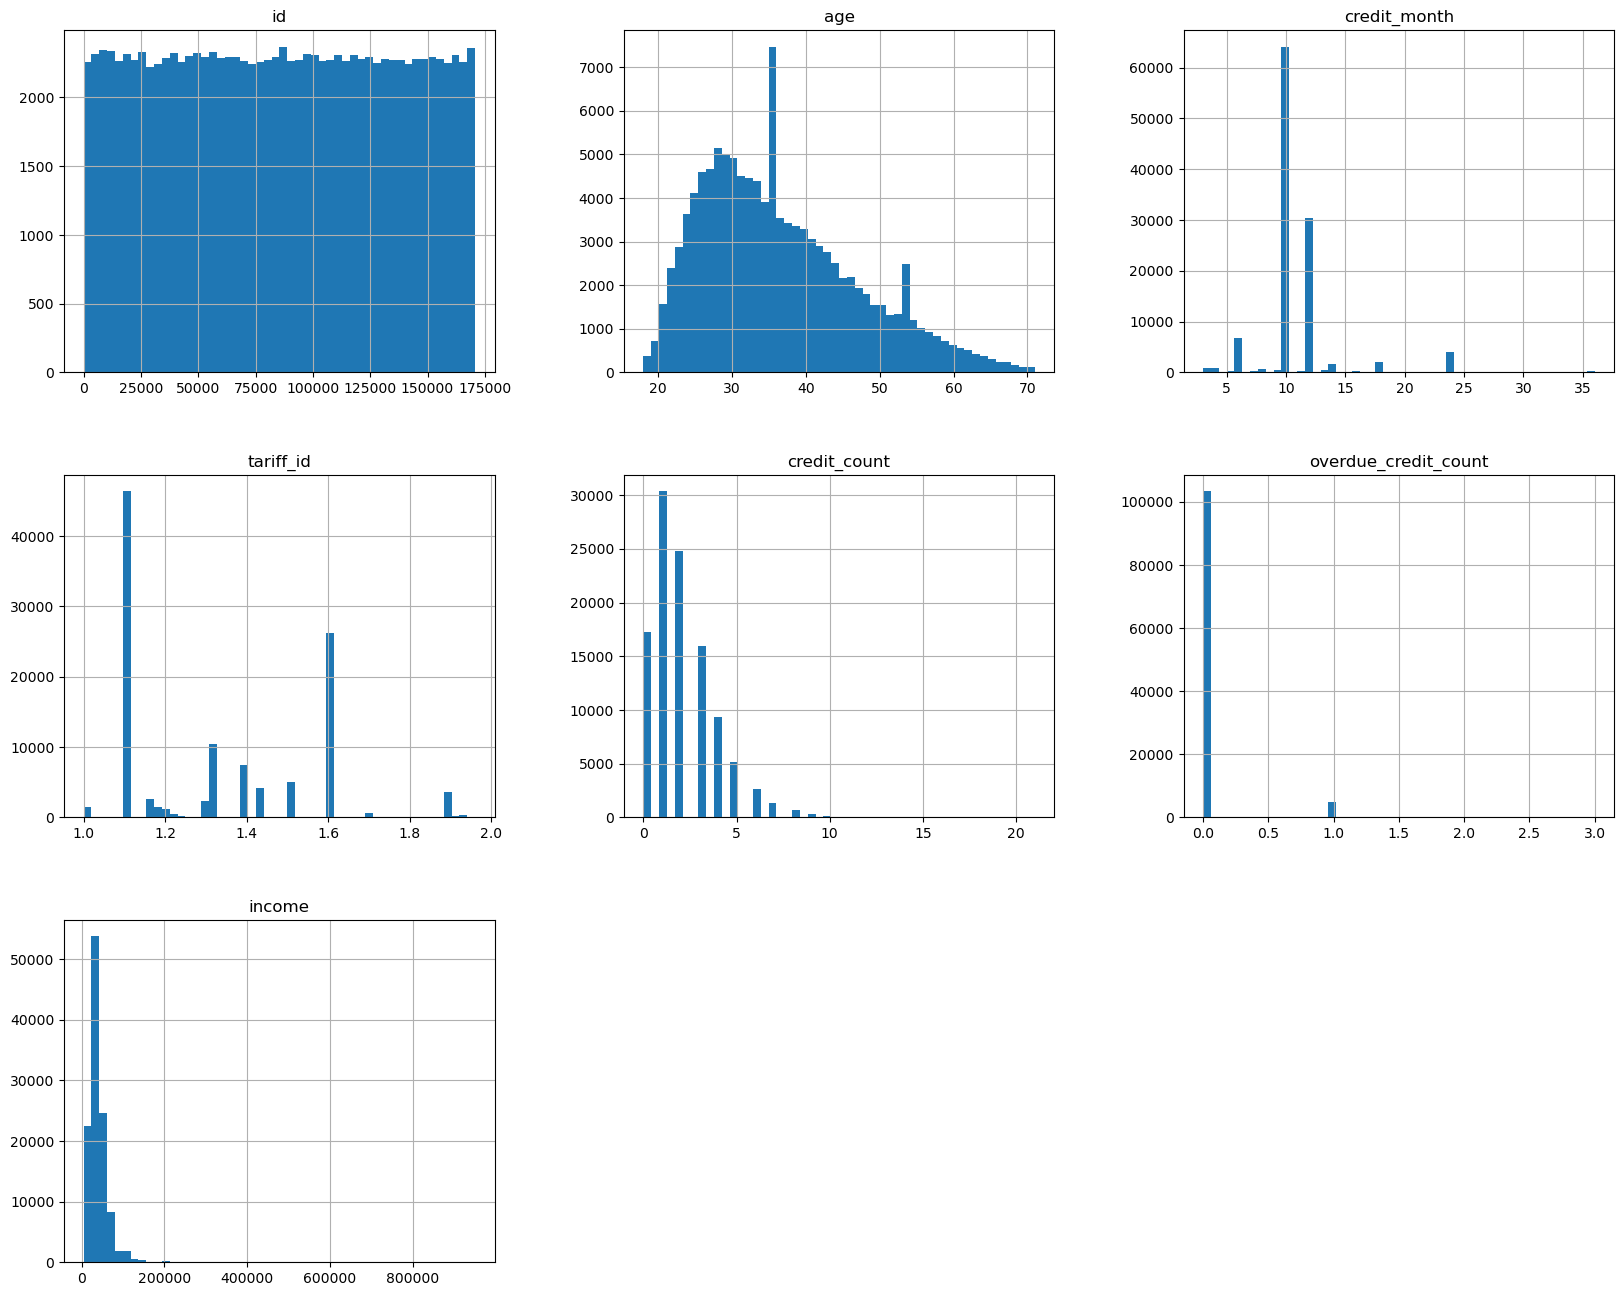

In [6]:
df_train.hist(bins=50, figsize=(20, 16))

Видим что некоторые "числа" записаны через запятую - не круто. Удалим id никакого смысла не несет :/
НО!!! tariff_id не выкидываем это номер тарифа поэтому может сослужит службу

Стратификацию делать стоит, потому что кроме credit_score все признаки распределены не ровно, поэтому стоит хоть как то выровнять выборку

In [7]:
df_train.drop(columns = ['id'], axis=1, inplace=True)
# df_test.drop(columns = ['id'], axis=1, inplace=True)
# df_train.drop(columns = ['tariff_id'], axis=1, inplace=True)
# df_test.drop(columns = ['tariff_id'], axis=1, inplace=True)

In [8]:
df_train

,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income,opened
0,M,24,UNM,"24000,00",10,1.60,SCH,2.0,0.0,SPC,"0,728851",ОБЛ ЛЕНИНГРАДСКАЯ,35000.0,True
1,M,23,UNM,"16339,00",18,1.10,SCH,2.0,0.0,SPC,"0,347385",МОСКВА Г,38000.0,True
2,M,54,UNM,"15652,00",10,1.32,GRD,2.0,0.0,SPC,"0,349705",ОБЛ МОСКОВСКАЯ,38000.0,True
3,F,52,UNM,"16560,00",10,1.10,SCH,1.0,0.0,SPC,"0,359232",РЕСП МОРДОВИЯ,28000.0,False
4,F,63,WID,"9078,00",18,1.10,SCH,4.0,0.0,SPC,"0,529368",ЧЕЛЯБИНСКАЯ ОБЛ,30000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114394,M,29,MAR,"29678,00",10,1.60,GRD,1.0,0.0,SPC,"0,721156",ОМСКАЯ ОБЛАСТЬ,25000.0,False
114395,M,29,MAR,"23068,00",15,1.10,GRD,3.0,0.0,SPC,"0,566393",ТЮМЕНСКАЯ ОБЛ,30000.0,True
114396,F,45,MAR,"16418,00",10,1.10,SCH,1.0,0.0,UMN,"0,327380",ОБЛ БРЯНСКАЯ,30400.0,False
114397,F,49,MAR,"12169,00",10,1.40,SCH,1.0,0.0,SPC,"0,467395",ТАМБОВСКАЯ ОБЛ,16000.0,False


In [9]:
df_train['credit_sum'] = df_train['credit_sum'].map(lambda x: x.replace(',', '.'))
df_train['credit_score'] = df_train['credit_score'].map(lambda x: x.replace(',', '.'))

df_train['credit_sum'] = df_train['credit_sum'].astype(dtype=np.float64)
df_train['credit_score'] = df_train['credit_score'].astype(dtype=np.float64)

df_train['opened'] = df_train['opened'].astype(dtype=np.int64)

In [10]:
df_test['credit_sum'] = df_test['credit_sum'].map(lambda x: x.replace(',', '.'))
df_test['credit_score'] = df_test['credit_score'].map(lambda x: x.replace(',', '.'))

df_test['credit_sum'] = df_test['credit_sum'].astype(dtype=np.float64)
df_test['credit_score'] = df_test['credit_score'].astype(dtype=np.float64)

In [11]:
df_test

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income
0,39162,F,18,UNM,39469.0,6,1.44,GRD,NaN,NaN,SPC,0.424628,САНКТ-ПЕТЕРБУРГ Г,30000.0
1,10673,F,63,WID,16693.0,10,1.32,GRD,2.0,0.0,SPC,0.311945,ОБЛ ЛЕНИНГРАДСКАЯ,21250.0
2,121409,M,42,MAR,60260.0,10,1.10,GRD,5.0,0.0,SPC,0.421982,МОСКВА Г,150000.0
3,23504,M,41,MAR,32479.0,12,1.10,GRD,1.0,0.0,DIR,0.406572,ТАТАРСТАН РЕСП,150000.0
4,69269,F,24,UNM,8159.0,12,1.10,SCH,2.0,0.0,SPC,0.418243,ТВЕРСКАЯ ОБЛ,16000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56342,14148,F,21,UNM,40980.0,24,1.90,GRD,1.0,0.0,SPC,0.429402,САМАРСКАЯ,22000.0
56343,153732,M,56,MAR,16009.0,10,1.10,SCH,0.0,0.0,SPC,0.494229,САМАРСКАЯ ОБЛ,29000.0
56344,37647,M,54,MAR,22448.0,12,1.10,SCH,1.0,0.0,UMN,0.312089,РОСТОВСКАЯ ОБЛ,26500.0
56345,92808,F,27,UNM,13829.0,10,1.90,GRD,2.0,0.0,SPC,0.339009,ОБЛ СВЕРДЛОВСКАЯ,38000.0


## Выделим категориальные и числовые признаки

In [12]:
categorical_train = df_train.select_dtypes(include=[object]).astype(str)
number_train = df_train.select_dtypes(include=[int, float, bool])

In [13]:
categorical_train = pd.concat([categorical_train, number_train['tariff_id']], axis=1)
number_train.drop(columns=['tariff_id'], inplace=True)

In [14]:
categorical_train['tariff_id'] = categorical_train['tariff_id'].map(lambda x: str(x))

In [15]:
categorical_test = df_test.select_dtypes(include=[object]).astype(str)
number_test = df_test.select_dtypes(include=[int, float, bool])

In [16]:
categorical_test = pd.concat([categorical_test, number_test['tariff_id']], axis=1)
number_test.drop(columns=['tariff_id'], inplace=True)

In [17]:
categorical_train['tariff_id'] = categorical_train['tariff_id'].map(lambda x: str(x))
categorical_test['tariff_id'] = categorical_test['tariff_id'].map(lambda x: str(x))

In [18]:
categorical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114399 entries, 0 to 114398
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          114399 non-null  object
 1   marital_status  114399 non-null  object
 2   education       114399 non-null  object
 3   job_pos         114399 non-null  object
 4   region          114399 non-null  object
 5   tariff_id       114399 non-null  object
dtypes: object(6)
memory usage: 5.2+ MB


In [19]:
number_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114399 entries, 0 to 114398
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   age                   114399 non-null  int64  
 1   credit_sum            114399 non-null  float64
 2   credit_month          114399 non-null  int64  
 3   credit_count          108210 non-null  float64
 4   overdue_credit_count  108210 non-null  float64
 5   credit_score          114399 non-null  float64
 6   income                114399 non-null  float64
 7   opened                114399 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 7.0 MB


In [20]:
df_train.isna().sum()

gender                     0
age                        0
marital_status             0
credit_sum                 0
credit_month               0
tariff_id                  0
education                  0
credit_count            6189
overdue_credit_count    6189
job_pos                    0
credit_score               0
region                   132
income                     0
opened                     0
dtype: int64

In [21]:
number_test

,id,age,credit_sum,credit_month,credit_count,overdue_credit_count,credit_score,income
0,39162,18,39469.0,6,NaN,NaN,0.424628,30000.0
1,10673,63,16693.0,10,2.0,0.0,0.311945,21250.0
2,121409,42,60260.0,10,5.0,0.0,0.421982,150000.0
3,23504,41,32479.0,12,1.0,0.0,0.406572,150000.0
4,69269,24,8159.0,12,2.0,0.0,0.418243,16000.0
...,...,...,...,...,...,...,...,...
56342,14148,21,40980.0,24,1.0,0.0,0.429402,22000.0
56343,153732,56,16009.0,10,0.0,0.0,0.494229,29000.0
56344,37647,54,22448.0,12,1.0,0.0,0.312089,26500.0
56345,92808,27,13829.0,10,2.0,0.0,0.339009,38000.0


In [22]:
categorical_test

,gender,marital_status,education,job_pos,region,tariff_id
0,F,UNM,GRD,SPC,САНКТ-ПЕТЕРБУРГ Г,1.44
1,F,WID,GRD,SPC,ОБЛ ЛЕНИНГРАДСКАЯ,1.32
2,M,MAR,GRD,SPC,МОСКВА Г,1.1
3,M,MAR,GRD,DIR,ТАТАРСТАН РЕСП,1.1
4,F,UNM,SCH,SPC,ТВЕРСКАЯ ОБЛ,1.1
...,...,...,...,...,...,...
56342,F,UNM,GRD,SPC,САМАРСКАЯ,1.9
56343,M,MAR,SCH,SPC,САМАРСКАЯ ОБЛ,1.1
56344,M,MAR,SCH,UMN,РОСТОВСКАЯ ОБЛ,1.1
56345,F,UNM,GRD,SPC,ОБЛ СВЕРДЛОВСКАЯ,1.9


In [23]:
categorical_test.isna().sum()

gender            0
marital_status    0
education         0
job_pos           0
region            0
tariff_id         0
dtype: int64

In [24]:
df_train['region'].value_counts()

region
ОБЛ МОСКОВСКАЯ                   8192
КРАСНОДАРСКИЙ КРАЙ               5010
САНКТ-ПЕТЕРБУРГ                  3751
МОСКВА                           3706
ТАТАРСТАН РЕСП                   3455
                                 ... 
ОБЛ.РОСТОВСКАЯ                      1
ОМСКАЯ                              1
РЕСП. КОМИ                          1
ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ       1
ТОМСКАЯ                             1
Name: count, Length: 284, dtype: int64

## Impute nans

In [25]:
imp_median = SimpleImputer(strategy='median')

In [66]:
number_test.replace([np.inf, -np.inf], 0, inplace=True)

In [67]:
number_train_imputed = pd.DataFrame(imp_median.fit_transform(number_train), columns=number_train.columns)
number_test_imputed = pd.DataFrame(imp_median.fit_transform(number_test), columns=number_test.columns)

In [27]:
number_train_imputed

,age,credit_sum,credit_month,credit_count,overdue_credit_count,credit_score,income,opened
0,24.0,24000.0,10.0,2.0,0.0,0.728851,35000.0,1.0
1,23.0,16339.0,18.0,2.0,0.0,0.347385,38000.0,1.0
2,54.0,15652.0,10.0,2.0,0.0,0.349705,38000.0,1.0
3,52.0,16560.0,10.0,1.0,0.0,0.359232,28000.0,0.0
4,63.0,9078.0,18.0,4.0,0.0,0.529368,30000.0,0.0
...,...,...,...,...,...,...,...,...
114394,29.0,29678.0,10.0,1.0,0.0,0.721156,25000.0,0.0
114395,29.0,23068.0,15.0,3.0,0.0,0.566393,30000.0,1.0
114396,45.0,16418.0,10.0,1.0,0.0,0.327380,30400.0,0.0
114397,49.0,12169.0,10.0,1.0,0.0,0.467395,16000.0,0.0


In [28]:
categorical_train.fillna('ОБЛ МОСКОВСКАЯ', inplace=True)

In [29]:
categorical_test.fillna('ОБЛ МОСКОВСКАЯ', inplace=True)

## Normalize

In [30]:
scaler = MinMaxScaler()

In [68]:
number_train_imputed = pd.DataFrame(scaler.fit_transform(number_train_imputed), columns=number_train_imputed.columns)
number_test = pd.DataFrame(scaler.fit_transform(number_test_imputed), columns=number_test_imputed.columns)

In [32]:
number_train_imputed

,age,credit_sum,credit_month,credit_count,overdue_credit_count,credit_score,income,opened
0,0.113208,0.107795,0.212121,0.095238,0.0,0.645978,0.031746,1.0
1,0.094340,0.068958,0.454545,0.095238,0.0,0.307886,0.034921,1.0
2,0.679245,0.065476,0.212121,0.095238,0.0,0.309942,0.034921,1.0
3,0.641509,0.070079,0.212121,0.047619,0.0,0.318386,0.024339,0.0
4,0.849057,0.032150,0.454545,0.190476,0.0,0.469177,0.026455,0.0
...,...,...,...,...,...,...,...,...
114394,0.207547,0.136578,0.212121,0.047619,0.0,0.639158,0.021164,0.0
114395,0.207547,0.103070,0.363636,0.142857,0.0,0.501992,0.026455,1.0
114396,0.509434,0.069359,0.212121,0.047619,0.0,0.290156,0.026878,0.0
114397,0.584906,0.047819,0.212121,0.047619,0.0,0.414250,0.011640,0.0


In [69]:
number_test

,id,age,credit_sum,credit_month,credit_count,overdue_credit_count,credit_score,income,factor
0,0.229356,0.000000,0.185122,0.090909,0.105263,0.0,0.407856,0.027281,0.000427
1,0.062503,0.849057,0.069508,0.212121,0.105263,0.0,0.299624,0.017498,0.001700
2,0.711057,0.452830,0.290660,0.212121,0.263158,0.0,0.405315,0.161449,0.003751
3,0.137651,0.433962,0.149640,0.272727,0.052632,0.0,0.390513,0.161449,0.009369
4,0.405686,0.113208,0.026188,0.272727,0.105263,0.0,0.401723,0.011628,0.003856
...,...,...,...,...,...,...,...,...,...
56342,0.082856,0.056604,0.192792,0.636364,0.052632,0.0,0.412442,0.018336,0.001927
56343,0.900365,0.716981,0.066036,0.212121,0.000000,0.0,0.474708,0.026163,0.002676
56344,0.220483,0.679245,0.098721,0.272727,0.052632,0.0,0.299762,0.023368,0.002055
56345,0.543548,0.169811,0.054970,0.212121,0.105263,0.0,0.325619,0.036225,0.004451


## New features

### Описание фичей
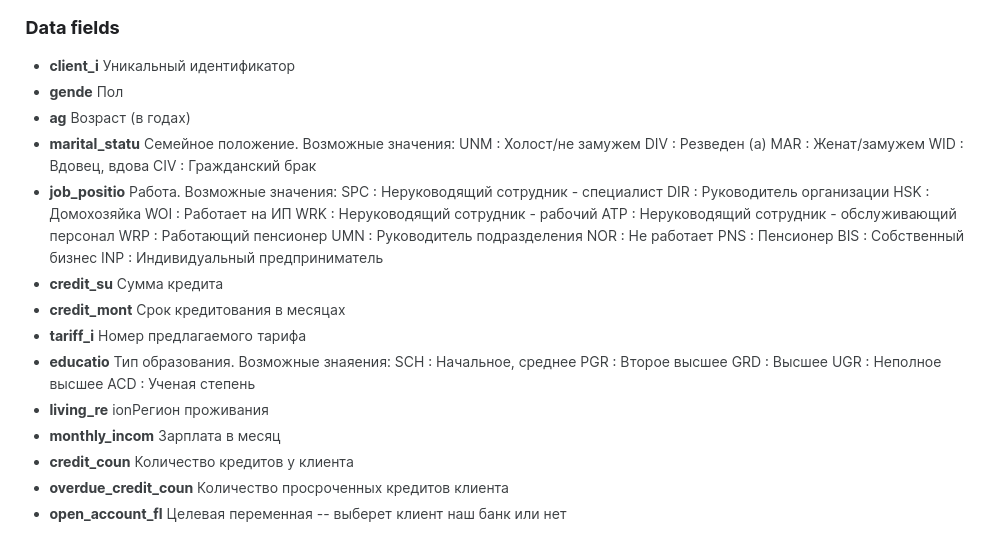

In [34]:
number_train_imputed.corr()['opened']

age                    -0.034788
credit_sum             -0.069257
credit_month            0.027354
credit_count            0.029789
overdue_credit_count    0.013779
credit_score            0.049692
income                 -0.021387
opened                  1.000000
Name: opened, dtype: float64

In [109]:
number_train_imputed['factor'] = number_train_imputed['income'] * number_train_imputed['credit_month'] / number_train_imputed['credit_sum']
number_test['factor'] = number_test['income'] * number_test['credit_month'] / number_test['credit_sum']

In [36]:
number_train_imputed.corr()['opened'].sort_values()

credit_sum             -0.069257
age                    -0.034788
income                 -0.021387
overdue_credit_count    0.013779
credit_month            0.027354
credit_count            0.029789
factor                  0.035149
credit_score            0.049692
opened                  1.000000
Name: opened, dtype: float64

In [70]:
number_train_imputed = number_train_imputed.astype(dtype=float)
number_test = number_test.astype(dtype=float)

In [110]:
number_train_imputed

,age,credit_sum,credit_month,credit_count,overdue_credit_count,credit_score,income,opened,factor
0,0.113208,0.107795,0.212121,0.095238,0.0,0.645978,0.031746,1.0,0.062471
1,0.094340,0.068958,0.454545,0.095238,0.0,0.307886,0.034921,1.0,0.230183
2,0.679245,0.065476,0.212121,0.095238,0.0,0.309942,0.034921,1.0,0.113132
3,0.641509,0.070079,0.212121,0.047619,0.0,0.318386,0.024339,0.0,0.073671
4,0.849057,0.032150,0.454545,0.190476,0.0,0.469177,0.026455,0.0,0.374031
...,...,...,...,...,...,...,...,...,...
114394,0.207547,0.136578,0.212121,0.047619,0.0,0.639158,0.021164,0.0,0.032870
114395,0.207547,0.103070,0.363636,0.142857,0.0,0.501992,0.026455,1.0,0.093335
114396,0.509434,0.069359,0.212121,0.047619,0.0,0.290156,0.026878,0.0,0.082202
114397,0.584906,0.047819,0.212121,0.047619,0.0,0.414250,0.011640,0.0,0.051635


In [38]:
number_test

,id,age,credit_sum,credit_month,credit_count,overdue_credit_count,credit_score,income,factor
0,0.229356,0.000000,0.185122,0.090909,NaN,NaN,0.407856,0.027281,0.013397
1,0.062503,0.849057,0.069508,0.212121,0.105263,0.0,0.299624,0.017498,0.053399
2,0.711057,0.452830,0.290660,0.212121,0.263158,0.0,0.405315,0.161449,0.117824
3,0.137651,0.433962,0.149640,0.272727,0.052632,0.0,0.390513,0.161449,0.294251
4,0.405686,0.113208,0.026188,0.272727,0.105263,0.0,0.401723,0.011628,0.121096
...,...,...,...,...,...,...,...,...,...
56342,0.082856,0.056604,0.192792,0.636364,0.052632,0.0,0.412442,0.018336,0.060524
56343,0.900365,0.716981,0.066036,0.212121,0.000000,0.0,0.474708,0.026163,0.084041
56344,0.220483,0.679245,0.098721,0.272727,0.052632,0.0,0.299762,0.023368,0.064556
56345,0.543548,0.169811,0.054970,0.212121,0.105263,0.0,0.325619,0.036225,0.139790


Новые признак факторности оплаты кредита - бомба. За одно действие топовый признак)

## One-Hot Encode

In [71]:
categorical_train_encoded = pd.get_dummies(categorical_train).astype(dtype=np.int32)
categorical_test_encoded = pd.get_dummies(categorical_test).astype(dtype=np.int32)

In [72]:
categorical_train_encoded

,gender_F,gender_M,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,education_ACD,education_GRD,education_PGR,...,tariff_id_1.48,tariff_id_1.5,tariff_id_1.52,tariff_id_1.56,tariff_id_1.6,tariff_id_1.7,tariff_id_1.9,tariff_id_1.91,tariff_id_1.94,tariff_id_1.96
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114394,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
114395,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
114396,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114397,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
categorical_test_encoded

,gender_F,gender_M,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,education_ACD,education_GRD,education_PGR,...,tariff_id_1.43,tariff_id_1.44,tariff_id_1.48,tariff_id_1.5,tariff_id_1.52,tariff_id_1.6,tariff_id_1.7,tariff_id_1.9,tariff_id_1.91,tariff_id_1.94
0,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56342,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
56343,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56344,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56345,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Concatenate 2 dataframes

In [111]:
df_train_prepared = pd.concat([number_train_imputed, categorical_train_encoded.astype(str)], axis=1).astype(dtype=float)
df_train_imputed = pd.concat([number_train_imputed.astype(dtype=float), categorical_train.astype(str)], axis=1)

In [112]:
df_train_imputed

,age,credit_sum,credit_month,credit_count,overdue_credit_count,credit_score,income,opened,factor,gender,marital_status,education,job_pos,region,tariff_id
0,0.113208,0.107795,0.212121,0.095238,0.0,0.645978,0.031746,1.0,0.062471,M,UNM,SCH,SPC,ОБЛ ЛЕНИНГРАДСКАЯ,1.6
1,0.094340,0.068958,0.454545,0.095238,0.0,0.307886,0.034921,1.0,0.230183,M,UNM,SCH,SPC,МОСКВА Г,1.1
2,0.679245,0.065476,0.212121,0.095238,0.0,0.309942,0.034921,1.0,0.113132,M,UNM,GRD,SPC,ОБЛ МОСКОВСКАЯ,1.32
3,0.641509,0.070079,0.212121,0.047619,0.0,0.318386,0.024339,0.0,0.073671,F,UNM,SCH,SPC,РЕСП МОРДОВИЯ,1.1
4,0.849057,0.032150,0.454545,0.190476,0.0,0.469177,0.026455,0.0,0.374031,F,WID,SCH,SPC,ЧЕЛЯБИНСКАЯ ОБЛ,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114394,0.207547,0.136578,0.212121,0.047619,0.0,0.639158,0.021164,0.0,0.032870,M,MAR,GRD,SPC,ОМСКАЯ ОБЛАСТЬ,1.6
114395,0.207547,0.103070,0.363636,0.142857,0.0,0.501992,0.026455,1.0,0.093335,M,MAR,GRD,SPC,ТЮМЕНСКАЯ ОБЛ,1.1
114396,0.509434,0.069359,0.212121,0.047619,0.0,0.290156,0.026878,0.0,0.082202,F,MAR,SCH,UMN,ОБЛ БРЯНСКАЯ,1.1
114397,0.584906,0.047819,0.212121,0.047619,0.0,0.414250,0.011640,0.0,0.051635,F,MAR,SCH,SPC,ТАМБОВСКАЯ ОБЛ,1.4


In [75]:
df_test_prepared = pd.concat([number_test, categorical_test_encoded.astype(str)], axis=1)
df_test_imputed = pd.concat([number_test, categorical_test.astype(dtype=str)], axis=1)

## Stratified shuffle

Применим стратификацию, потому что выборка явно не сбалансированная

In [76]:
split = StratifiedShuffleSplit(n_splits=5, test_size=.2, random_state=42)
for train_index, test_index in split.split(df_train_prepared, df_train_prepared['opened']):
    strat_train_set = df_train_prepared.loc[train_index]
    strat_test_set = df_train_prepared.loc[test_index]

In [77]:
y_strat = strat_train_set['opened']
X_strat = strat_train_set.drop(columns=['opened'], axis=1)

In [78]:
X_strat.replace([np.inf, -np.inf], 0, inplace=True)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_strat, y_strat, test_size=0.33, random_state=42)

# ML

## LogisticRegression

In [80]:
lr = LogisticRegression(dual=False, max_iter=2_000_000, n_jobs=-1, multi_class='ovr')

In [81]:
params = {
    'C': np.arange(2, 20, 0.1),
    'penalty': ['l2'],
    'solver': ['newton-cholesky'],
    # 'l1_ratio': [0.1, 0.5, 1],
}

In [82]:
gs = GridSearchCV(lr, params, scoring='f1', n_jobs=-1, cv=5, verbose=2)

In [83]:
# gs.fit(X_strat, y_strat)

In [84]:
# gs.best_score_, gs.best_params_

Логистическая регрессия не оправдала надежд) Забудем как страшный сон)))

## Бустинг

### XGB

In [85]:
bst = XGBClassifier(n_jobs=-1, max_depth=10, learning_rate=0.01, objective='binary:logistic')

In [ ]:
bst.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, bst.predict(X_test))

### CatBoost

In [121]:
X = df_train_imputed.drop(columns=['opened'], axis=1)
y = df_train_imputed['opened']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [123]:
X_train

,age,credit_sum,credit_month,credit_count,overdue_credit_count,credit_score,income,factor,gender,marital_status,education,job_pos,region,tariff_id
84665,0.169811,0.052696,0.212121,0.095238,0.0,0.435263,0.026455,0.106491,M,MAR,SCH,SPC,КРАСНОЯРСКИЙ КРАЙ,1.1
90444,0.415094,0.010412,0.000000,0.285714,0.0,0.127326,0.031746,0.000000,F,DIV,UGR,SPC,ОБЛ САМАРСКАЯ,1.5
59151,0.339623,0.112555,0.212121,0.095238,0.0,0.415085,0.021164,0.039886,F,MAR,SCH,SPC,ОБЛ КАЛУЖСКАЯ,1.1
78124,0.056604,0.125482,0.212121,0.095238,0.0,0.661847,0.029630,0.050088,F,UNM,GRD,SPC,РОСТОВСКАЯ ОБЛ,1.6
86266,0.226415,0.037782,0.272727,0.095238,0.0,0.454005,0.037037,0.267351,M,DIV,SCH,SPC,КРАЙ ПЕРМСКИЙ,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13872,0.207547,0.157900,0.212121,0.095238,0.0,0.456457,0.042328,0.056863,M,MAR,SCH,SPC,МОСКВА,1.32
21906,0.226415,0.029656,0.030303,0.047619,0.0,0.439727,0.052910,0.054065,F,MAR,GRD,SPC,ОБЛ ЛЕНИНГРАДСКАЯ,1.1
69395,0.264151,0.121933,0.090909,0.000000,0.0,0.477510,0.031746,0.023669,F,MAR,SCH,SPC,КРАСНОЯРСКИЙ КРАЙ,1.6
29974,0.169811,0.080932,0.212121,0.047619,0.0,0.432107,0.026455,0.069338,M,UNM,SCH,SPC,САНКТ-ПЕТЕРБУРГ Г,1.32


In [93]:
model_params = {
    'iterations': 3700,
    'custom_loss': [metrics.F1()],
    'allow_writing_files': False,
    'random_seed': 42,
}

In [94]:
model_cat = CatBoostClassifier(**model_params)
model_cat.fit(X_train, y_train, verbose=True, plot=True, eval_set=(X_test, y_test), cat_features=np.where(X_train.dtypes != float)[0])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.053866
0:	learn: 0.6616952	test: 0.6621010	best: 0.6621010 (0)	total: 56.9ms	remaining: 3m 30s
1:	learn: 0.6334210	test: 0.6342990	best: 0.6342990 (1)	total: 88.1ms	remaining: 2m 42s
2:	learn: 0.6100085	test: 0.6111999	best: 0.6111999 (2)	total: 125ms	remaining: 2m 34s
3:	learn: 0.5889811	test: 0.5904850	best: 0.5904850 (3)	total: 164ms	remaining: 2m 31s
4:	learn: 0.5711461	test: 0.5729873	best: 0.5729873 (4)	total: 198ms	remaining: 2m 26s
5:	learn: 0.5541131	test: 0.5562545	best: 0.5562545 (5)	total: 231ms	remaining: 2m 22s
6:	learn: 0.5389195	test: 0.5412787	best: 0.5412787 (6)	total: 265ms	remaining: 2m 19s
7:	learn: 0.5254505	test: 0.5280373	best: 0.5280373 (7)	total: 299ms	remaining: 2m 17s
8:	learn: 0.5139565	test: 0.5167903	best: 0.5167903 (8)	total: 329ms	remaining: 2m 14s
9:	learn: 0.5034834	test: 0.5065482	best: 0.5065482 (9)	total: 360ms	remaining: 2m 12s
10:	learn: 0.4942558	test: 0.4975005	best: 0.4975005 (10)	total: 389ms	remaining: 2m 10s
11:	learn

In [95]:
accuracy_score(y_test, model_cat.predict(X_test))

0.8260839160839161

### LightGBM

# Save results

In [96]:
bst = model_cat

In [125]:
X_test = df_test_imputed.drop(columns=['id'], axis=1)

In [137]:
y_pred = bst.predict(X_test)

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=7]=0.0004265418727016251 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [ ]:
df_save = df_test[['id']]
df_save['opened'] = y_pred.astype(bool)